# Data Analyst Associate Practical Exam Submission

**Instructions**
- Use any tools that you are comfortable with to perform the tasks required (for example Tableau, Power BI, MS Excel, Python, R).
- Write your solutions in the workspace provided from your certification page.
- Include all of the visualizations you create to complete the tasks.
- Visualizations must be visible in the published version of the workspace. Links to
external visualizations will not be accepted.
- You do not need to include any code.
- You must pass all criteria to pass this exam. The full criteria can be found here.

**Background**
Vivendo is a fast food chain in Brazil with over 200 outlets.
Customers often claim compensation from the company for food poisoning.
The legal team processes these claims. The legal team has offices in four locations.
The legal team wants to improve how long it takes to reply to customers and close claims.
The head of the legal department wants a report on how each location differs in the time it
takes to close claims.

**Data**

The dataset contains one row for each claim.
The dataset can be downloaded from here <https://s3.amazonaws.com/talent-assets.datacamp.com/food_claims_2212.csv>.

## Import Libraries And Load Dataset

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read the CSV file into a pandas DataFrame
df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/food_claims_2212.csv')

#Display the DataFrame
print(df)

      claim_id  time_to_close claim_amount  amount_paid   location   
0            1            317  R$ 74474.55     51231.37     RECIFE  \
1            2            195  R$ 52137.83     42111.30  FORTALEZA   
2            3            183   R$ 24447.2     23986.30   SAO LUIS   
3            4            186  R$ 29006.28     27942.72  FORTALEZA   
4            5            138   R$ 19520.6     16251.06     RECIFE   
...        ...            ...          ...          ...        ...   
1995      1996            176   R$ 28982.3     24265.02     RECIFE   
1996      1997            166   R$ 5188.44      4772.77  FORTALEZA   
1997      1998            179  R$ 11975.85     10087.81     RECIFE   
1998      1999            162  R$ 23516.28     23310.24     RECIFE   
1999      2000            150    R$ 8051.4      6417.92     RECIFE   

      individuals_on_claim linked_cases      cause  
0                       15        False    unknown  
1                       12         True    unknown  


## Data Validation

In [70]:
# Check the data types of columns
data_types = df.dtypes

# Display the data types
print(data_types)

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object


In [71]:
# Check for missing values

missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64


In [72]:
# Check the number of unique values in claim_id

print("Number of unique values in claim_id:", df['claim_id'].nunique())
print("Unique values in location column", df['location'].unique())
print("Unique values in linked_cases column", df['linked_cases'].unique())
print("Unique values in cause column", df['cause'].unique())

Number of unique values in claim_id: 2000
Unique values in location column ['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
Unique values in linked_cases column [False True nan]
Unique values in cause column ['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']


In [90]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [91]:
# Check if all values in amount_paid are rounded to 2 decimal places
rounded_values = df['amount_paid'].apply(lambda x: round(float(x), 2))
all_rounded1 = rounded_values.equals(df['amount_paid'])

print("Are all values in amount_paid rounded to 2 decimal places?", all_rounded1)

Are all values in amount_paid rounded to 2 decimal places? True


In [92]:
# Check if individuals_on_claim  has the minium of 1 person
min_value = df['individuals_on_claim'].min()
print(f"The minium value of individuals_on_claim is 1: {min_value ==1}")

The minium value of individuals_on_claim is 1: True


## Data Cleaning

In [93]:
## Replace missing values in amount_paid column with the overall median amount paid

# Replace 'NA' values with NaN
df['amount_paid'].replace('NA', np.nan, inplace=True)

# Convert the 'amount_paid' column to float
df['amount_paid'] = df['amount_paid'].astype(float)

# Calculate the overall median amount paid
overall_median = df['amount_paid'].median()

# Replace NaN values with the overall median amount paid
df['amount_paid'].fillna(overall_median, inplace=True)

# Filter and display the updated 'NA' values
na_values = df[df['amount_paid'] == overall_median]
print(na_values['amount_paid'])

# Check if there are still missing values in amount_paid column
print("The number of missing values in amount_paid column: ", df['amount_paid'].isnull().sum())

32      20105.7
112     20105.7
173     20105.7
178     20105.7
206     20105.7
319     20105.7
472     20105.7
495     20105.7
513     20105.7
575     20105.7
583     20105.7
603     20105.7
644     20105.7
670     20105.7
707     20105.7
855     20105.7
867     20105.7
956     20105.7
989     20105.7
1013    20105.7
1014    20105.7
1031    20105.7
1103    20105.7
1166    20105.7
1191    20105.7
1202    20105.7
1476    20105.7
1519    20105.7
1638    20105.7
1684    20105.7
1734    20105.7
1801    20105.7
1834    20105.7
1898    20105.7
1961    20105.7
1968    20105.7
Name: amount_paid, dtype: float64
The number of missing values in amount_paid column:  0


In [94]:
## Replace missing values in linked_cases column with False

# Replace missing values with False
affected_rows = df['linked_cases'].isna().sum()
df['linked_cases'].fillna(False, inplace=True)

print("Number of rows affected:", affected_rows)

# Check if there are still missing values in linked_cases column
print("The number of missing values in linked_cases column: ", df['linked_cases'].isnull().sum())

Number of rows affected: 26
The number of missing values in linked_cases column:  0


In [95]:
# Replace 'VEGETABLES' with 'vegetable' in cause column
df['cause'] = df['cause'].replace('VEGETABLES', 'vegetable')

# Replace 'Meat' with 'meat' in cause column
df['cause'] = df['cause'].replace(' Meat', 'meat')
   
# Check updated unique values in cause
print("Updated unique values in cause column", df['cause'].unique())

Updated unique values in cause column ['unknown' 'meat' 'vegetable']


In [96]:
# Remove currency sign in claim_amount and convert to float
df['claim_amount'] = df['claim_amount'].str.strip('R$').str.replace(',', '').astype(np.float64)


# Check updated values and data type of claim_amount
print(df['claim_amount'].head())
print(df['claim_amount'].dtypes)


0    74474.55
1    52137.83
2    24447.20
3    29006.28
4    19520.60
Name: claim_amount, dtype: float64
float64


In [97]:
# Check if all values in claim_amount are rounded to 2 decimal places
is_rounded = np.isclose(df['claim_amount'], np.round(df['claim_amount'], 2))
all_rounded = is_rounded.all()

print(f"All values in claim_amount are rounded to 2 decimal places: {all_rounded}")

All values in claim_amount are rounded to 2 decimal places: True


## Task 1

For every column in the data:

a. State whether the values match the description given in the table

b. State the number of missing values in the column.

c. Describe what you did to make values match the description if they did not
match.

There are 2000 rows and 8 columns in the dataset. After performing data validating and cleaning, there is no duplicate but there are 36 missing values in `amount_paid` column and 26 missing values in `linked_cases` column. Data cleaning and adjustments were made for each column following the given description as below:

- `claim_id`: 2000 unique claim ids, as expected being the unique identifier of the claim. No missing values.
- `time_to_close`: positive numeric values, no missing values, match description
- `claim_amount`: the currency sign and comma in claim_amount were removed to convert it to numeric values. Validation task was performed to confirm all values in this column are rounded to 2 decimal places. Values match the description. No missing values.
- `amount_paid`: validation task was performed to confirm all values in this column are rounded to 2 decimal places. 36 missing values were replaced with amount_paid median. Values match description.
- `location`: categorial data with 4 unique variables as provided, no missing values. Values match description.
- `individials_on_claim`: numeric values, no missing values to be replaced. Validation task was performed to confirm this column has minium of 1. Values match description.
- `linked_cases`: only contains True or False values as expected, 26 missing values were replaced with False. Values match description.
- `cause`: contains 2 variables that are not in the given description ('VEGETABLES', 'MEAT') so original values do not match description. The unexpected variables were then replaced with 'vegetable' and 'meat' to match description. After processing, the column now only contains 3 unique given variables. No missing values to be replaced.

After data validation and cleaning, the dataset now contains analysis-ready data with 2000 rows, 8 columns and no missing values.


## Task 2

Create a visualization that shows the number of claims in each location. Use the
visualization to:

**a. State which category of the variable location has the most observations**

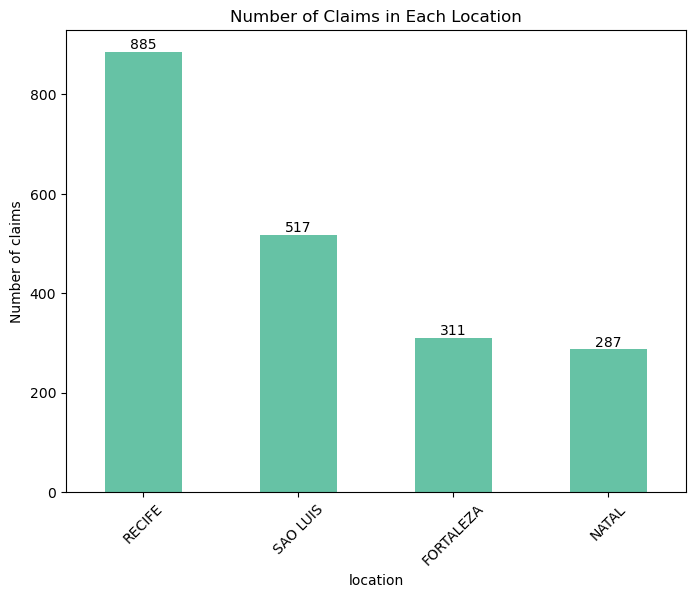

In [100]:
#Count the number of claims in each location
location_counts = data['location'].value_counts()

#Create a bar plot
plt.figure(figsize=(8,6))
bars = location_counts.plot(kind='bar')
plt.xlabel('location')
plt.ylabel('Number of claims')
plt.title('Number of Claims in Each Location')
plt.xticks(rotation=45)

# Add value labels on each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.show()

Among the 4 locations - RECIFE, FORTALEZA, SAO LUIS, and NATAL:
- RECIFE has the most claims with 885 claims
- SAO LUIS has the second most claims with 517 claims
- FORTALEZA and NATAL have around 300 claims, 311 and 287 claims respectively


**b. Explain whether the observations are balanced across categories of the variable location**

Although the number of claims appear to be relatively similar between 'FORTALEZA' and 'NATAL' locations, 'SAO LUIS' has more claims than the aforementioned two locations, and RECIFE' has significant more claims than the others. Therefore, the observations are not balanced across categories of the variable location.

## Task 3

****Describe** the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.**

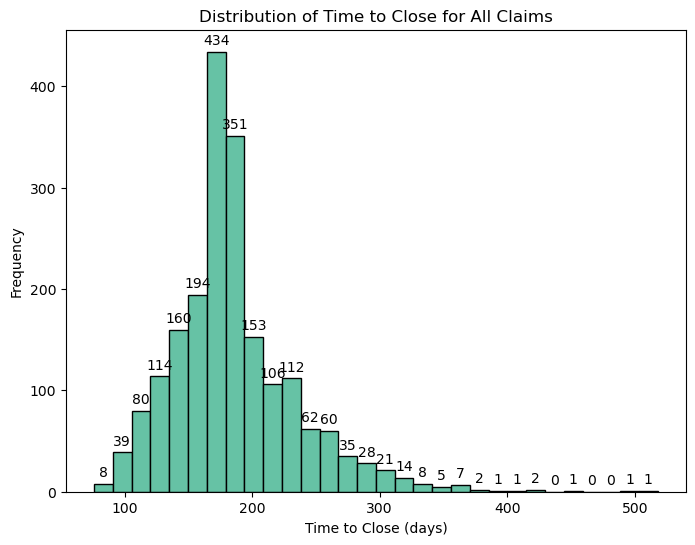

count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64
Median time to close:  179.0
Mode time to close:  [176]


In [102]:
# Extract the time_to_close column
time_to_close = data['time_to_close']

# Plot the histogram
plt.figure(figsize=(8,6))
plt.hist(time_to_close, bins=30, edgecolor='k')
plt.xlabel('Time to Close (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Close for All Claims')

# Add values labels on each bar
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

# Calculate the descriptive statistics
statistics = time_to_close.describe()
print(statistics)

# Calculate the median
median = np.median(time_to_close)

# Calculate the mode
mode_counts = time_to_close.value_counts()
modes = mode_counts[mode_counts == mode_counts.max()].index.tolist()

# Print the median & mode
print("Median time to close: ", median)
print("Mode time to close: ", modes)

The prominent peak lies to the left with tail skewed to the right, so it suggests a right_skewed distributions with more claims with shorter time durations to close, while a few claims take longer time durations to close.

The distributions appears to be concentrated towards the left side, indicating that a significant number of claims were resolved relatively quickly in less than 250 days. However, there are still some claims that took longer to close, resulting in the right-skewed shape and a few outliers with more than 300 days to close.

In general, the chart suggests that the legal team are able to close most claims between 150 and 250 days, with the mean value of 185 days. But in order to improve customer satisfaction, further investigation will require to understand why there are still some claims take more than 250 days to process.

## Task 4

**Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.**

To analyze the relationship between time to close and location, we can create a box plot that displays the distribution of time to close for each location.


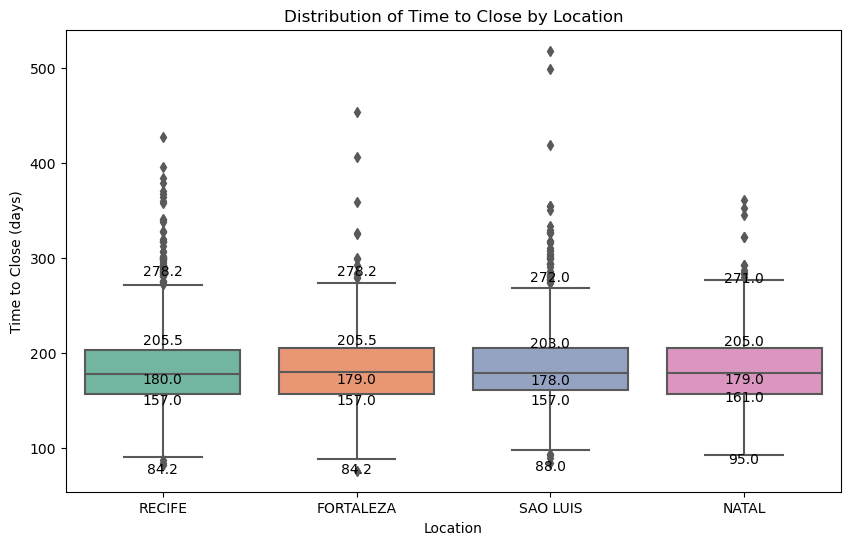

In [104]:
# Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

import seaborn as sns

# Set the color palette to "pastel"
sns.set_palette("Set2")

# Create the box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='location', y='time_to_close', data=data)

# Calculate quartiles for each location
quartiles = data.groupby('location')['time_to_close'].describe()[['25%', '50%', '75%']].reset_index()

# Add quartile and whisker labels to the plot
for i in range(len(quartiles)):
    loc = quartiles.loc[i, 'location']
    q1 = quartiles.loc[i, '25%']
    q2 = quartiles.loc[i, '50%']
    q3 = quartiles.loc[i, '75%']
    upper_whisker = data[data['location'] == loc]['time_to_close'].quantile(0.75) + 1.5 * (q3 - q1)
    lower_whisker = data[data['location'] == loc]['time_to_close'].quantile(0.25) - 1.5 * (q3 - q1)
    ax.text(i, upper_whisker, f"{upper_whisker:.1f}", ha='center', va='bottom')
    ax.text(i, q3, f"{q3:.1f}", ha='center', va='bottom')
    ax.text(i, q2, f"{q2:.1f}", ha='center', va='top')
    ax.text(i, q1, f"{q1:.1f}", ha='center', va='top')
    ax.text(i, lower_whisker, f"{lower_whisker:.1f}", ha='center', va='top')

plt.xlabel('Location')
plt.ylabel('Time to Close (days)')
plt.title('Distribution of Time to Close by Location')
plt.show()

The box plots for the time_to_close variable across different locations show that the majority of claims have similar distributions in terms of the median, quartiles, and interquartile range (IQR). The boxes in the box plots are of relatively similar lengths, indicating comparable central tendencies for the time to close across locations. The medians are in the middle of the boxes and the whiskers are about the same on both sides of the boxes also indicate that the distribution is symmetric (normal distribution). In general, all locations have the same average time to close of around 180 days.

However, there are notable differences in the outliers between the locations. The presence of different outliers suggests that there are specific cases or circumstances in certain locations that lead to unusual long or short claim closure times. Specifically, SAO LUIS has 2 extreme outliers of 499 and 518 days in time to close, while FORTALEZA has the lowest outlier of 76 days in time to close. These outliers could be influenced by various factors, such as the complexity of claims, specific challenges or efficiencies in claims processing, or unique circumstances within those locations.

The chart also suggests that the legal team should pay more attention to RECIFE location as it has the most outliers (or over 800 claims as we have analyzed in task 3), which will require more resources, manpower to ensure that location has enough capacity to meet the average processing time of 180 days. 

In conclusion, while the box plots display similar quartiles and whiskers, the presence of different outliers suggests that there are variations in the extreme values of the time to close across different locations. It is important to investigate the reasons behind these outliers further and understand the context of each location to identify patterns or trends that could help improve the efficiency and effectiveness of the time it takes to reply to customers and close claims.
